In [1]:
using Pkg
Pkg.add("Luxor")
Pkg.add("Colors")
using Luxor
using Colors

    Updating registry at `C:\Users\17404\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\17404\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\17404\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\17404\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\17404\.julia\environments\v1.7\Manifest.toml`


In [2]:
phi = (1 + sqrt(5)) / 2
sidelength = 50

50

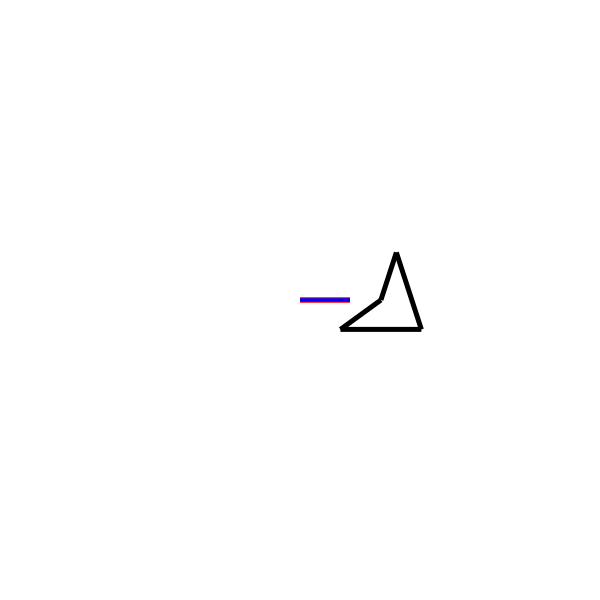

In [6]:
function dart(radialdistance, polarangle, orientation) #function for drawing a dart
    ```
    radialdistance is the distance between rotation center and the origin
    polarangle is the turing angle before the turle move forward by r
    orientation is the rotation degrees of starting drawing the dart or kite
    ```
    
    #move the turtle to the position of starting place by polar coordinate and rotation
    Penup(t)
    Turn(t, polarangle)
    Forward(t, radialdistance)
    Turn(t, -polarangle)
    Turn(t, orientation)
    Pendown(t)
    
    #start to draw a dart 
    Pencolor(t, "Black")
    Forward(t, sidelength)
    Turn(t, -36)
    Forward(t, sidelength)
    Turn(t, 144)
    Forward(t, sidelength * phi)
    Turn(t, 108)
    Forward(t, sidelength * phi)
    Turn(t, 144)
    
    #move the turtle back to the origin
    Penup(t)
    Turn(t, -orientation)
    Turn(t, polarangle)
    Forward(t, -radialdistance)
    Turn(t, -polarangle)
    Pendown(t)
end

@draw begin
    t = Turtle()
    Penwidth(t,5)
    
    #check the starting point
    Pencolor(t, "Red")
    Forward(t, 50)
    Forward(t, -50)
    
    #draw a dart
    dart(50,36,-36)
    
    #check the ending point
    Penwidth(t,3)
    Pencolor(t, "Blue")
    Forward(t, 50)
    Forward(t, -50)
end

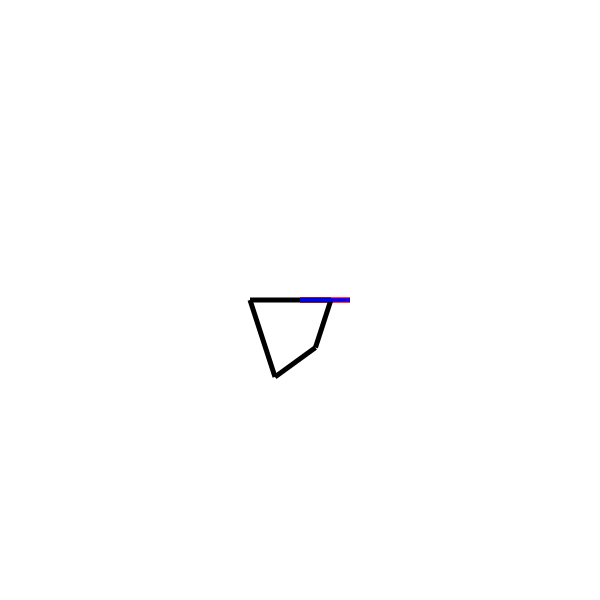

In [8]:
function kite(radialdistance, polarangle, orientation) #function for drawing a kite
    ```
    radialdistance is the distance between rotation center and the origin
    polarangle is the turing angle before the turle move forward by r
    orientation is the rotation degrees of starting drawing the dart or kite
    ```
    
    #move the turtle to the position of starting place by polar coordinate and rotation
    Penup(t)
    Turn(t, polarangle)
    Forward(t, radialdistance)
    Turn(t, -polarangle)
    Turn(t, orientation)
    Pendown(t)
    
    #start to draw a kite
    Pencolor(t, "Black")
    Turn(t, 108)
    Forward(t, sidelength)
    Turn(t, 108)
    Forward(t, sidelength * phi)
    Turn(t, 108)
    Forward(t, sidelength * phi)
    Turn(t, 108)
    Forward(t, sidelength)
    Turn(t, -72)
    
    #move the turtle back to the origin
    Penup(t)
    Turn(t, -orientation)
    Turn(t, polarangle)
    Forward(t, -radialdistance)
    Turn(t, -polarangle)
    Pendown(t)
end

@draw begin
    t = Turtle()
    Penwidth(t,5)
    
    #check the starting point
    Pencolor(t, "Red")
    Forward(t, 50)
    Forward(t, -50)
    
    #draw a kite
    kite(50,72,36)
    
    #check the ending point
    Penwidth(t,3)
    Pencolor(t, "Blue")
    Forward(t, 50)
    Forward(t, -50)
end

In [9]:
function draw(graph) # function for drawing dart or kite by stored information
    for i in 1:length(graph)
        if graph[i][1] == "K"
            kite(graph[i][2],graph[i][3],graph[i][4])
        else
            dart(graph[i][2],graph[i][3],graph[i][4])
        end
    end
end

draw (generic function with 1 method)

In [10]:
function substitution(graph)
    
    number_tiles = length(graph)#Remember the number of tiles at the beginning
    
    for i in 1:length(graph)#Do substitution for each tile
        
        if graph[i][1] == "K"
            y = graph[i][2] * sin(-(graph[i][3] * pi / 180)) + sidelength * sin((180 - graph[i][4]) * pi / 180)
            x = graph[i][2] * cos(-(graph[i][3] * pi / 180)) + sidelength * cos((180 - graph[i][4]) * pi / 180)
            new_radialdistance = sqrt(y^2+x^2)#find the new distance by doing a vector addition
            
            #Find the new angle based on the x-y relation
                if x > 0
                    new_polarangle = atan(y/x) * 180 /pi
                elseif x < 0 && y >= 0
                    new_polarangle = atan(y/x) * 180 /pi + 180
                elseif x < 0 && y < 0
                    new_polarangle = atan(y/x) * 180 /pi - 180
                elseif x == 0 && y > 0
                    new_polarangle = 90
                elseif x == 0 && y < 0
                    new_polarangle = -90
                elseif x == 0 && y == 0
                    new_polarangle = 0
                end
            
            #darw new tiles
            push!(graph, ["K",new_radialdistance,-new_polarangle,graph[i][4] + 108])
            push!(graph, ["K",new_radialdistance,-new_polarangle,graph[i][4] - 108])
            push!(graph, ["D",new_radialdistance,-new_polarangle,graph[i][4] + 144])
        else
            y = graph[i][2] * sin(-(graph[i][3] * pi / 180)) + sidelength * phi * sin(-(graph[i][4] * pi / 180))
            x = graph[i][2] * cos(-(graph[i][3] * pi / 180)) + sidelength * phi * cos(-(graph[i][4] * pi / 180))
            new_radialdistance = sqrt(y^2+x^2)
                if x > 0
                    new_polarangle = atan(y/x) * 180 /pi
                elseif x < 0 && y >= 0
                    new_polarangle = atan(y/x) * 180 /pi + 180
                elseif x < 0 && y < 0
                    new_polarangle = atan(y/x) * 180 /pi - 180
                elseif x == 0 && y > 0
                    new_polarangle = 90
                elseif x == 0 && y < 0
                    new_polarangle = -90
                elseif x == 0 && y == 0
                    new_polarangle = 0
                end
            
            push!(graph, ["K",new_radialdistance,-new_polarangle,graph[i][4] - 108])
            push!(graph, ["D",new_radialdistance,-new_polarangle,graph[i][4] + 144])
        end
    end
    
    for i in 1:number_tiles
        popfirst!(graph)
    end
    
end

substitution (generic function with 1 method)

In [41]:
function vertices(graph)
    
    for i in 1:length(graph)
        
        if graph[i][1] == "K"
            
            r = sqrt((phi * sidelength)^2 + sidelength^2 - 2 * phi * sidelength^2 * cos(72 * pi / 180))
            
            vertix1 = [graph[i][2] * cos(-(graph[i][3] * pi / 180)),
                       graph[i][2] * sin(-(graph[i][3] * pi / 180))]
            vertix2 = [graph[i][2] * cos(-(graph[i][3] * pi / 180)) + sidelength * cos((180 - graph[i][4] + 72) * pi / 180),
                       graph[i][2] * sin(-(graph[i][3] * pi / 180)) + sidelength * sin((180 - graph[i][4] + 72) * pi / 180)]
            vertix3 = [graph[i][2] * cos(-(graph[i][3] * pi / 180)) + r * cos((180 - graph[i][4]) * pi / 180),
                       graph[i][2] * sin(-(graph[i][3] * pi / 180)) + r * sin((180 - graph[i][4]) * pi / 180)]
            vertix4 = [graph[i][2] * cos(-(graph[i][3] * pi / 180)) + sidelength * cos((180 - graph[i][4] - 72) * pi / 180),
                       graph[i][2] * sin(-(graph[i][3] * pi / 180)) + sidelength * sin((180 - graph[i][4] - 72) * pi / 180)]
            println(sin((180 - graph[i][4]) * pi / 180))
        else
            r = sqrt(2 * (sidelength)^2 - 2 * sidelength^2 * cos(144 * pi / 180))
            
            vertix1 = [graph[i][2] * cos(-(graph[i][3] * pi / 180)),
                       graph[i][2] * sin(-(graph[i][3] * pi / 180))]
            vertix2 = [graph[i][2] * cos(-(graph[i][3] * pi / 180)) + sidelength * cos((graph[i][4]) * pi / 180),
                       graph[i][2] * sin(-(graph[i][3] * pi / 180)) + sidelength * sin((graph[i][4]) * pi / 180)]
            vertix3 = [graph[i][2] * cos(-(graph[i][3] * pi / 180)) + r * cos((graph[i][4] - 18) * pi / 180),
                       graph[i][2] * sin(-(graph[i][3] * pi / 180)) + r * sin((graph[i][4] - 18) * pi / 180)]
            vertix4 = [graph[i][2] * cos(-(graph[i][3] * pi / 180)) + sidelength * phi * cos((graph[i][4] + 72) * pi / 180),
                       graph[i][2] * sin(-(graph[i][3] * pi / 180)) + sidelength * phi * sin((graph[i][4] + 72) * pi / 180)]
        end

        push!(vertices_list,[vertix1,vertix2,vertix3,vertix4])
    end
end

vertices (generic function with 1 method)

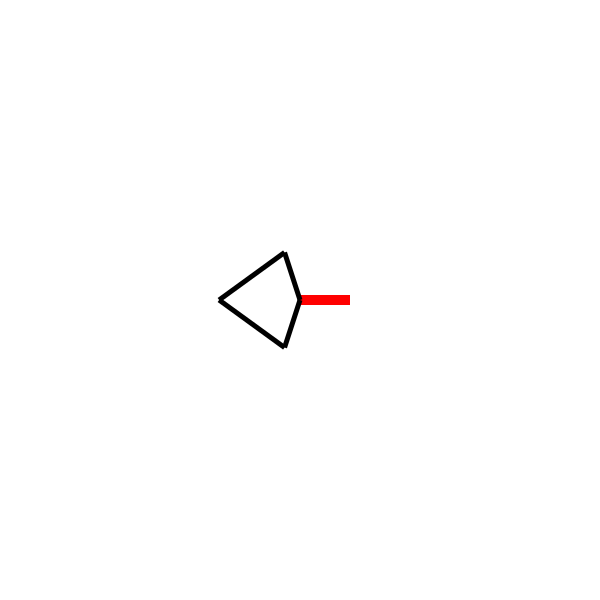

In [22]:
graph = [["K",0,0,0]]# initial kite

@draw begin
    t = Turtle()
    
    Pencolor(t, "Red")
    Penwidth(t, 10)
    Forward(t, 50)
    Forward(t, -50)
    
    Penwidth(t,5)
    draw(graph)
end

In [23]:
vertices_list = []
vertices(graph)
vertices_list

1.2246467991473532e-16


1-element Vector{Any}:
 [[0.0, -0.0], [-15.450849718747378, -47.552825814757675], [-80.90169943749474, 9.907600726170917e-15], [-15.450849718747367, 47.55282581475768]]

In [26]:
sin(pi)

1.2246467991473532e-16

In [29]:
cos(pi)

-1.0

In [17]:
sidelength * cos(72 * pi / 180) + sidelength * phi * cos(36 * pi / 180)

80.90169943749476

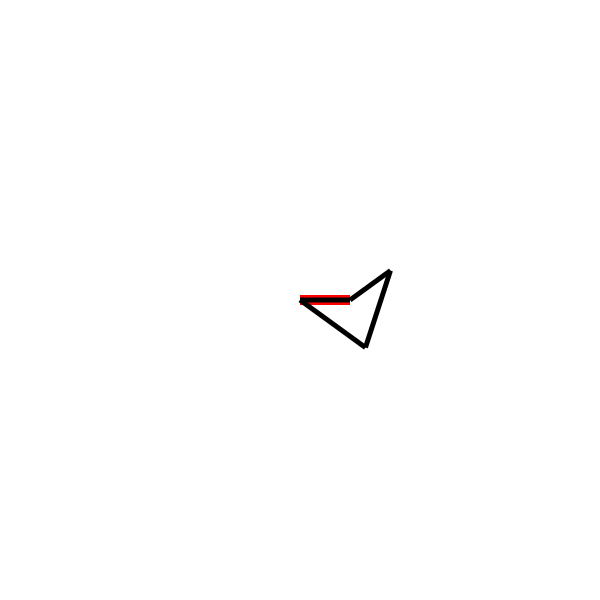

In [42]:
graph = [["D",0,0,0]]

@draw begin
    t = Turtle()
    
    Pencolor(t, "Red")
    Penwidth(t, 10)
    Forward(t, 50)
    Forward(t, -50)
    
    Penwidth(t,5)
    draw(graph)
end

In [43]:
vertices_list = []
vertices(graph)
vertices_list

1-element Vector{Any}:
 [[0.0, -0.0], [50.0, 0.0], [90.45084971874738, -29.389262614623657], [25.000000000000004, 76.94208842938133]]

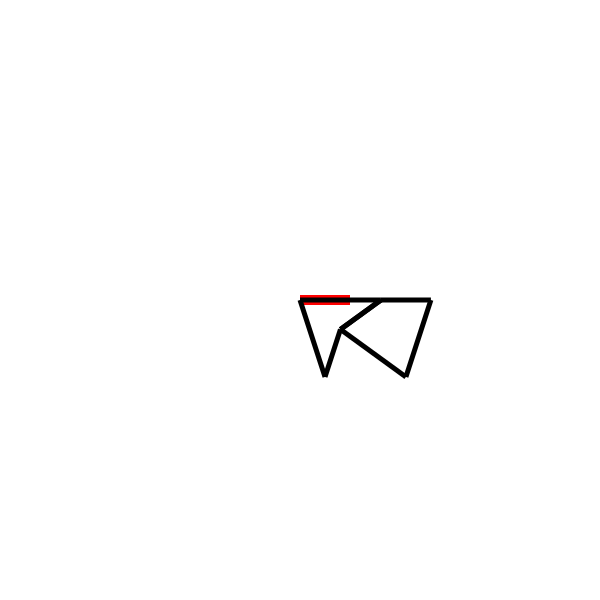

In [35]:
substitution(graph)
graph

@draw begin
    t = Turtle()
    
    Pencolor(t, "Red")
    Penwidth(t, 10)
    Forward(t, 50)
    Forward(t, -50)
    
    Penwidth(t,5)
    draw(graph)
end

In [36]:
vertices_list = []
vertices(graph)
vertices_list

-0.9510565162951536


2-element Vector{Any}:
 [[80.90169943749474, -0.0], [130.90169943749476, -1.2246467991473532e-14], [105.90169943749473, -76.94208842938134], [40.45084971874737, -29.38926261462365]]
 [[80.90169943749474, -0.0], [40.45084971874738, -29.38926261462366], [-9.549150281252636, -29.389262614623668], [105.90169943749474, -76.94208842938133]]

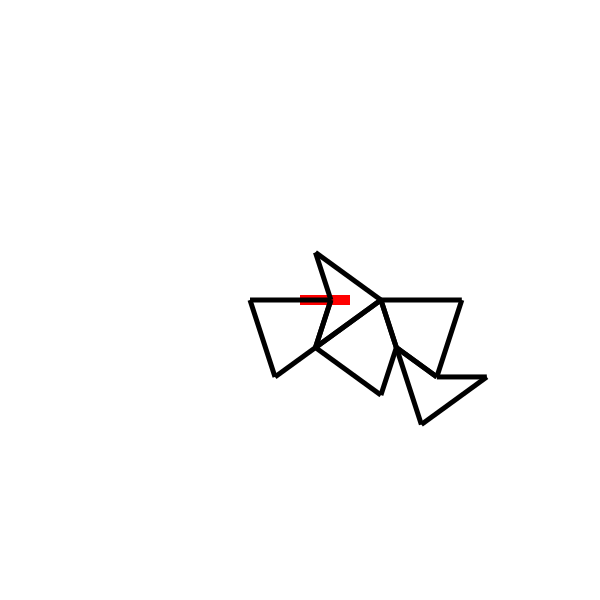

In [37]:
substitution(graph)
graph

@draw begin
    t = Turtle()
    
    Pencolor(t, "Red")
    Penwidth(t, 10)
    Forward(t, 50)
    Forward(t, -50)
    
    Penwidth(t,5)
    draw(graph)
end

In [38]:
vertices_list = []
vertices(graph)
vertices_list

1.2246467991473532e-16
0.5877852522924736
0.5877852522924732


5-element Vector{Any}:
 [[96.35254915624209, -47.552825814757675], [80.90169943749471, -95.10565162951535], [15.45084971874735, -47.55282581475767], [80.90169943749473, 7.105427357601002e-15]]
 [[96.35254915624209, -47.552825814757675], [80.90169943749473, 7.105427357601002e-15], [161.80339887498945, 4.263256414560601e-14], [136.80339887498945, -76.94208842938134]]
 [[96.35254915624209, -47.552825814757675], [136.80339887498945, -76.94208842938133], [152.25424859373683, -124.49491424413901], [161.80339887498945, 7.105427357601002e-15]]
 [[15.450849718747376, -47.55282581475769], [-24.999999999999993, -76.94208842938134], [-49.999999999999986, 0.0], [30.90169943749475, -1.4210854715202004e-14]]
 [[15.450849718747376, -47.55282581475769], [30.901699437494738, -7.105427357601002e-15], [71.3525491562421, 29.389262614623668], [-50.0, -2.1316282072803006e-14]]

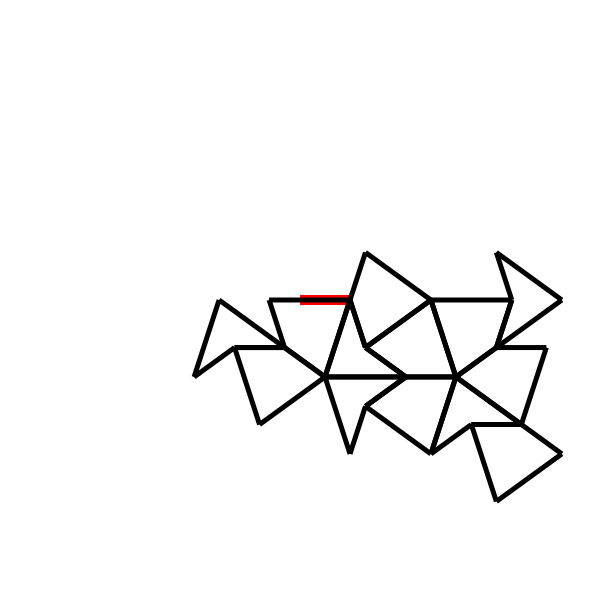

In [39]:
for i in 1:length(graph)
    graph[i][2] = graph[i][2] * phi
end
substitution(graph)

@draw begin
    t = Turtle()
    
    Pencolor(t, "Red")
    Penwidth(t, 10)
    Forward(t, 50)
    Forward(t, -50)
    
    Penwidth(t,5)
    draw(graph)
end

In [40]:
vertices_list = []
vertices(graph)
vertices_list

0.9510565162951535
-0.9510565162951536
-0.9510565162951536
0.5877852522924734
-0.9510565162951535
0.5877852522924731
-0.9510565162951535
0.0


13-element Vector{Any}:
 [[105.9016994374947, -76.94208842938133], [65.45084971874734, -47.55282581475767], [130.9016994374947, 0.0], [155.9016994374947, -76.94208842938133]]
 [[105.9016994374947, -76.94208842938133], [155.9016994374947, -76.94208842938134], [130.90169943749467, -153.88417685876266], [65.45084971874732, -106.33135104400498]]
 [[105.9016994374947, -76.94208842938133], [65.45084971874734, -106.33135104400499], [15.450849718747321, -106.331351044005], [130.9016994374947, -153.88417685876266]]
 [[196.35254915624205, -47.552825814757654], [246.35254915624205, -47.55282581475767], [221.35254915624202, -124.494914244139], [155.90169943749467, -76.9420884293813]]
 [[196.35254915624205, -47.552825814757654], [155.90169943749467, -76.9420884293813], [130.9016994374947, 4.263256414560601e-14], [211.80339887498943, 2.1316282072803006e-14]]
 [[196.35254915624205, -47.552825814757654], [211.80339887498943, 2.1316282072803006e-14], [252.2542485937368, 29.38926261462369], [130.9016994